# Group Theory Homework: A Study of Point Group Symmetries in Molecules

A notebook that lays out plainly all the code used to complete the associated homework assg. Written by Theo N. Dionne.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 100

## Calculating the decomposition of the mechanical reps

### Functions

In [2]:
def get_irrep_multiplicity(representation_characters, character_table, elements_per_class):
   """A function that gets the multiplicity of each irrep 
   for real representations using the magic formula.

      Arguments:
         representation_characters (np.array((# classes), dtype=float)) : characters of the rep to decompose.
         character_table (np.array((# classes, # classes), dtype=float)) : character table; line->irrep, col->class.
         elements_per_class (np.array((# classes), dtype=int)) : # elements per class

      Returns:
         multiplicity_vector (np.array((# irreps), dtype=int)) : multiplicities for each irreps in provided rep.
    """
   # multiply each character by the number of elements in its class
   representation_characters_adjusted = representation_characters*elements_per_class

   # perform a matrix multiplication between the character table and divide by group size
   multiplicity_vector = character_table @ representation_characters_adjusted / np.sum(elements_per_class)

   return multiplicity_vector

### AB4 (C4v) Decomposition

In [3]:
# define the character table of the PG
character_table_C4v = np.array([
    [1, 1, 1, 1, 1],
    [1, 1, 1,-1,-1],
    [1, 1,-1, 1,-1],
    [1, 1,-1,-1, 1],
    [2,-2, 0, 0, 0]
])  

# define the number of elements per class
elements_per_class_C4v = np.array([1,1,2,2,2])

# the characters of the mechanical representation
M_characters_C4v = np.array([15,-1,1,1,3])

# Getting and printing the mutliplicities
M_multiplicities_C4v = get_irrep_multiplicity(M_characters_C4v, character_table_C4v, elements_per_class_C4v)
print("M multiplicities :", M_multiplicities_C4v) # in the same order as the table in the pdf

M multiplicities : [3. 1. 1. 2. 4.]


In [4]:
# characters for subdecompositions
Az_characters_C4v = np.array([1,1,1,1,1])
Axy_characters_C4v = np.array([2,-2,0,0,0])
Bz_characters_C4v = np.array([4,0,0,0,2])
Bxy_characters_C4v = np.array([8,0,0,0,0])

# magic formula applications
Az_multiplicities_C4v = get_irrep_multiplicity(Az_characters_C4v, character_table_C4v, elements_per_class_C4v)
Axy_multiplicities_C4v = get_irrep_multiplicity(Axy_characters_C4v, character_table_C4v, elements_per_class_C4v)
Bz_multiplicities_C4v = get_irrep_multiplicity(Bz_characters_C4v, character_table_C4v, elements_per_class_C4v)
Bxy_multiplicities_C4v = get_irrep_multiplicity(Bxy_characters_C4v, character_table_C4v, elements_per_class_C4v)

# print out answers
print("Az multiplicities :", Az_multiplicities_C4v)
print("Axy multiplicities :", Axy_multiplicities_C4v)
print("Bz multiplicities :", Bz_multiplicities_C4v)
print("Bxy multiplicities :", Bxy_multiplicities_C4v)

Az multiplicities : [1. 0. 0. 0. 0.]
Axy multiplicities : [0. 0. 0. 0. 1.]
Bz multiplicities : [1. 0. 0. 1. 1.]
Bxy multiplicities : [1. 1. 1. 1. 2.]


### UF6 (Oh) Decomposition

In [5]:
# define the character table of the PG
character_table_Oh = np.array([
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1,-1,-1,-1,-1,-1],
[1, 1,-1,-1, 1, 1, 1,-1,-1, 1],
[1, 1,-1,-1, 1,-1,-1, 1, 1,-1],
[2, 2, 0, 0,-1, 2, 2, 0, 0,-1],
[2, 2, 0, 0,-1,-2,-2, 0, 0, 1],
[3,-1, 1,-1, 0, 3,-1, 1,-1, 0],
[3,-1, 1,-1, 0,-3, 1,-1, 1, 0],
[3,-1,-1, 1, 0, 3,-1,-1, 1, 0],
[3,-1,-1, 1, 0,-3, 1, 1,-1, 0]
])  

# define the number of elements per class
elements_per_class_Oh = np.array([1, 3, 6, 6, 8, 1, 3, 6, 6, 8])

# the characters of the mechanical representation
M_characters_Oh = np.array([21,-3, 3,-1, 0,-3, 5,-1, 3, 0])

# Getting and printing the mutliplicities
M_multiplicities_Oh = get_irrep_multiplicity(M_characters_Oh, character_table_Oh, elements_per_class_Oh)
print(M_multiplicities_Oh) # in the same order as the table in the pdf

[1. 0. 0. 0. 1. 0. 1. 3. 1. 1.]


## Getting symmetry adapted modes

In [6]:
# functions

def _get_permutation_matrices(atom_coordinates, vector_rep):
    """A function that gets the matrices (permutation matrices) that define 
    how the atoms are permutationped under the action of the group.
    
    Arguments:
        atom_coordinates (np.array((3, # atoms), dtype=float)) : the cartesian coordinates for the atoms.
        vector_rep (np.array((# group elements, 3, 3), dtype=float)) : array of matrices for the vector rep.

    Returns:
        permutation_matrices (np.array((# group elements, # atoms, # atoms), dtype=int)) the permutation matrix allowing
            to represent the action of the group elements on the atoms.
        number_of_operations (int) : # elements in the group.
        number_of_atoms (int) : # atoms.
    """

    # generate empty permutation matrix array and get numbers
    number_of_operations = np.shape(vector_rep)[0] # number of group elements considered
    number_of_atoms = np.shape(atom_coordinates)[1] # number of atoms considered
    permutation_matrices = np.zeros((number_of_operations, number_of_atoms, number_of_atoms))

    # applies every transformation to the atom coordinates
    transformed_coordinates = vector_rep @ atom_coordinates

    for i in range(number_of_operations): # loop over elems in the group
        for j in range(number_of_atoms): # loop over all atoms (for init atom coordinates)
            for k in range(number_of_atoms): # loop over all atoms (for transformed atom coordinates)
                norm_transformed_minus_reference = np.linalg.norm(transformed_coordinates[i,:,k] - atom_coordinates[:,j])
                if norm_transformed_minus_reference == 0: # the norm can only be zero when v' = v, only happens for one vec
                    # set permutation matrix
                    permutation_matrices[i,j,k] = 1 # place 1 at correct place to get the permutation matrix
                    break # doesn't need to look further once found the match
        
    return permutation_matrices, number_of_operations, number_of_atoms


def get_mechanical_representation(atom_coordinates, vector_rep):
    """A function that calculates the mechanical representation based off the fact 
    that M = S \\otimes V where S is the permutation matrix and V is the vector representation
    
    Arguments:
        atom_coordinates (np.array((3, # atoms), dtype=float)) : the cartesian coordinates for the atoms.
        vector_rep (np.array((# group elements, 3, 3), dtype=float)) : array of matrices for the vector rep.

    Returns:
        mechanical_rep (np.array((# group elements, 3*# atoms, 3*# atoms), dtype=float)) : array of matrices for the mechanical rep.
    """

    # obtain permutation matrices
    permutation_matrices, number_of_operations, number_of_atoms = _get_permutation_matrices(atom_coordinates, vector_rep)
    
    # initialize mechanical rep matrices
    m_rep_size = 3*number_of_atoms
    mechanical_rep = np.zeros((number_of_operations, m_rep_size, m_rep_size))
    
    # generate the matrices (take tensor product of S\\otimesV)
    for i in range(number_of_operations):
        mechanical_rep[i,:,:] = np.kron(permutation_matrices[i,:,:], vector_rep[i,:,:])

    return mechanical_rep


def get_symmetry_adapted_modes(initial_coords, irrep, mechanical_rep, character_table, elements_per_class):
    """A function that gets the symmetry adapted modes using the projector formula (loosely, like chemists do it).
    
    Arguments:
        initial_coords ()
        irrep ()
        mechanical_rep ()
        character_table ()
        elements_per_class ()
        
    Returns:

    """
    
    # get numbers
    number_of_atoms = np.shape(initial_coords)[1] # number of atoms, useful for reshaping at the end
    number_of_elements = np.shape(mechanical_rep)[0] # number of elements in the group

    # initialize and format arrays
    initial_coords_flat = np.ravel(initial_coords, order="F") # flattens initial coords in col-dominant order
    symmetry_adapted_modes_flat = np.zeros_like(initial_coords_flat) # flat version of the symmetry adapted modes (useful for mult with M)
    
    # Repeat the characters of the selected irrep once for every element in the class
    characters_for_irreps = character_table[irrep, :] # gets the appropriate character vector
    broadcasted_characters = np.repeat(characters_for_irreps, elements_per_class) # broadcasts characters appropriately

    # loops over elements loosely implementing projector formula
    for i in range(number_of_elements): # loops over every elem (for creating the sum in proj formula)
        symmetry_adapted_modes_flat += broadcasted_characters[i] * mechanical_rep[i,:,:] @ initial_coords_flat

    # return properly reshaped array
    return symmetry_adapted_modes_flat.reshape((3,number_of_atoms), order="F")

### AB4 (C4v)

In [7]:
# spatial coordinates of the molecule AB4
atom_spatial_coordinates_C4v = np.array([
    [ 0, 1,-1,-1, 1],
    [ 0, 1, 1,-1,-1],
    [ 1.5, 0, 0, 0, 0]
])

# Writting down the matrices from genpos
vector_rep_C4v = np.array([
    [
        [ 1, 0, 0], # 1
        [ 0, 1, 0],
        [ 0, 0, 1]
    ],
    [
        [-1, 0, 0], # C2
        [ 0,-1, 0],
        [ 0, 0, 1]
    ],
    [
        [ 0,-1, 0], # C4+
        [ 1, 0, 0],
        [ 0, 0, 1]
    ],
    [
        [ 0, 1, 0], # C4-
        [-1, 0, 0],
        [ 0, 0, 1]
    ],
    [
        [ 1, 0, 0], # sigma_y
        [ 0,-1, 0],
        [ 0, 0, 1]
    ],
    [
        [-1, 0, 0], # sigma_x
        [ 0, 1, 0],
        [ 0, 0, 1]
    ],
    [
        [ 0,-1, 0], # sigma_d1
        [-1, 0, 0],
        [ 0, 0, 1]
    ],
    [
        [ 0, 1, 0], # sigma_d2
        [ 1, 0, 0],
        [ 0, 0, 1]
    ]
])

# generate the mechanical rep
mechanical_rep_C4v = get_mechanical_representation(atom_spatial_coordinates_C4v, vector_rep_C4v)


In [8]:
def plot_mode_C4v(sym_adap, atom_spatial_coordinates, title):
    # Initialize axis object
    ax = plt.figure().add_subplot(projection='3d')

    # plotting vectors
    ax.quiver(
        atom_spatial_coordinates[0,:],
        atom_spatial_coordinates[1,:],
        atom_spatial_coordinates[2,:],
        sym_adap[0,:],
        sym_adap[1,:],
        sym_adap[2,:],
        length=0.5,
        normalize=True,
        color="purple"
        )

    x_1 = np.linspace(-1,1,100)
    y_1 = np.linspace(-1,1,100)
    z_1 = np.zeros(100)

    x_2 = np.zeros(100)
    y_2 = np.zeros(100)
    z_2 = np.linspace(0,np.sqrt(2),100)

    ax.plot3D(x_1, y_1, z_1, color="grey")
    ax.plot3D(x_1, -y_1, z_1, color="grey")
    ax.plot3D(x_2, y_2, z_2, color="grey")

    # plotting the atoms
    ax.scatter(atom_spatial_coordinates[0,0],atom_spatial_coordinates[1,0],atom_spatial_coordinates[2,0], s=100, alpha=1)
    ax.scatter(atom_spatial_coordinates[0,1:],atom_spatial_coordinates[1,1:],atom_spatial_coordinates[2,1:], s=100, alpha=1)

    # plotting title
    ax.set_title(title)
    ax.set_axis_off()
    
    pass

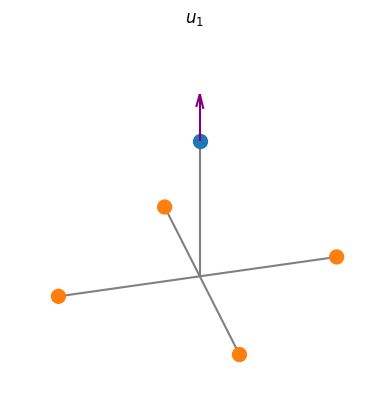

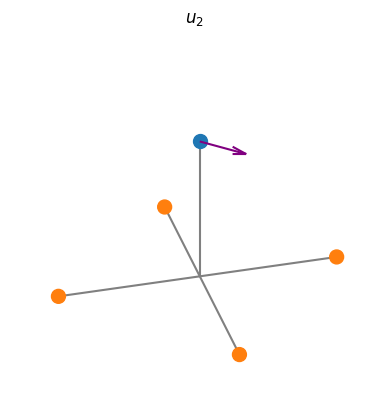

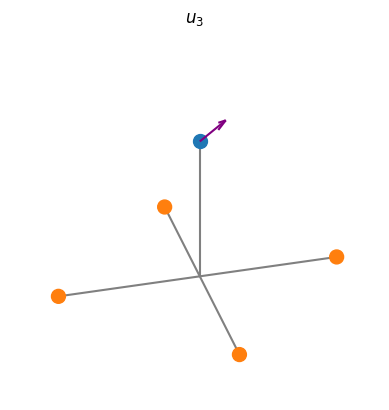

In [9]:
initial_coords_u1 = np.zeros((3,5), dtype=float)
initial_coords_u1[2,0] = 1 # init vector
sym_adap_u1 = get_symmetry_adapted_modes(initial_coords_u1, 0, mechanical_rep_C4v, character_table_C4v, elements_per_class_C4v)

initial_coords_u2 = np.zeros((3,5), dtype=float)
initial_coords_u2[0,0] = 1 # init vector
sym_adap_u2 = get_symmetry_adapted_modes(initial_coords_u2, 4, mechanical_rep_C4v, character_table_C4v, elements_per_class_C4v)

initial_coords_u3 = np.zeros((3,5), dtype=float)
initial_coords_u3[1,0] = 1 # init vector
sym_adap_u3 = get_symmetry_adapted_modes(initial_coords_u3, 4, mechanical_rep_C4v, character_table_C4v, elements_per_class_C4v)

# plotting
plot_mode_C4v(sym_adap_u1, atom_spatial_coordinates_C4v, "$u_1$")
plot_mode_C4v(sym_adap_u2, atom_spatial_coordinates_C4v, "$u_2$")
plot_mode_C4v(sym_adap_u3, atom_spatial_coordinates_C4v, "$u_3$")

plt.show()


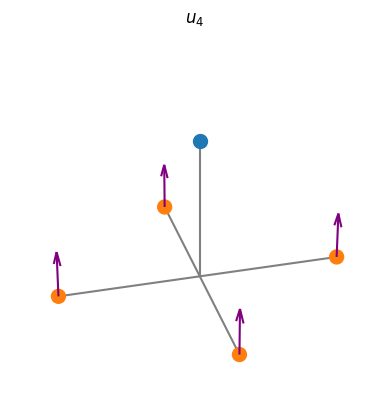

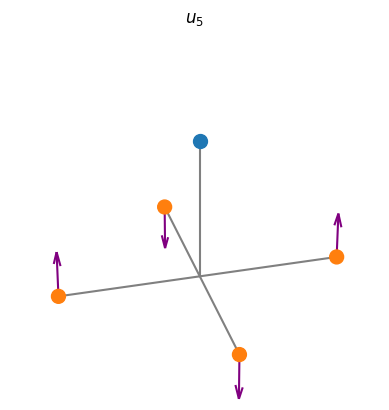

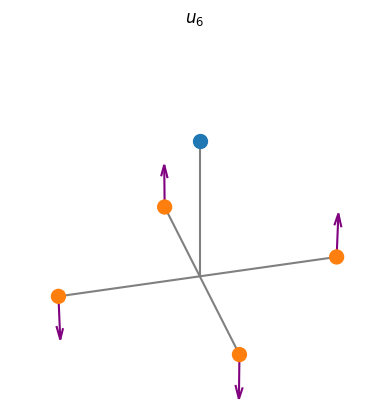

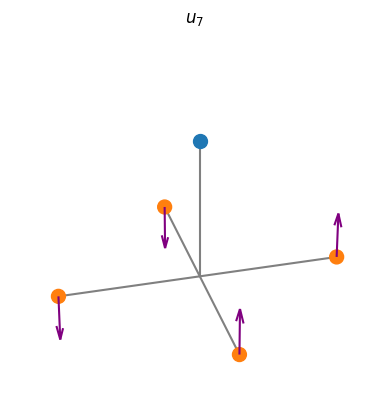

In [10]:
initial_coords_u4 = np.zeros((3,5), dtype=float)
initial_coords_u4[2,1] = 1 # init vector
sym_adap_u4 = get_symmetry_adapted_modes(initial_coords_u4, 0, mechanical_rep_C4v, character_table_C4v, elements_per_class_C4v)

initial_coords_u5 = np.zeros((3,5), dtype=float)
initial_coords_u5[2,1] = 1 # init vector
sym_adap_u5 = get_symmetry_adapted_modes(initial_coords_u5, 3, mechanical_rep_C4v, character_table_C4v, elements_per_class_C4v)

initial_coords_u6 = np.zeros((3,5), dtype=float)
initial_coords_u6[2,1] = 1 # init vector
initial_coords_u6[2,2] = 1 # init vector
sym_adap_u6 = get_symmetry_adapted_modes(initial_coords_u6, 4, mechanical_rep_C4v, character_table_C4v, elements_per_class_C4v)

initial_coords_u7 = np.zeros((3,5), dtype=float)
initial_coords_u7[2,1] = 1 # init vector
initial_coords_u7[2,2] = -1 # init vector
sym_adap_u7 = get_symmetry_adapted_modes(initial_coords_u7, 4, mechanical_rep_C4v, character_table_C4v, elements_per_class_C4v)


# plotting
plot_mode_C4v(sym_adap_u4, atom_spatial_coordinates_C4v, "$u_4$")
plot_mode_C4v(sym_adap_u5, atom_spatial_coordinates_C4v, "$u_5$")
plot_mode_C4v(sym_adap_u6, atom_spatial_coordinates_C4v, "$u_6$")
plot_mode_C4v(sym_adap_u7, atom_spatial_coordinates_C4v, "$u_7$")

plt.show()

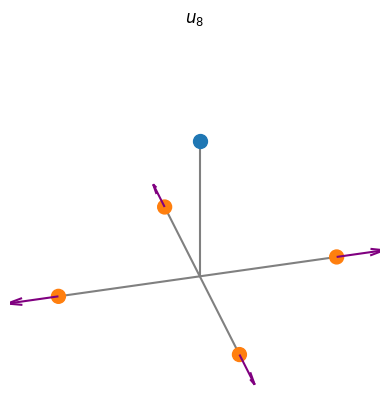

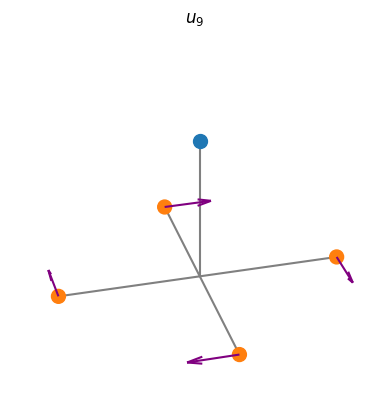

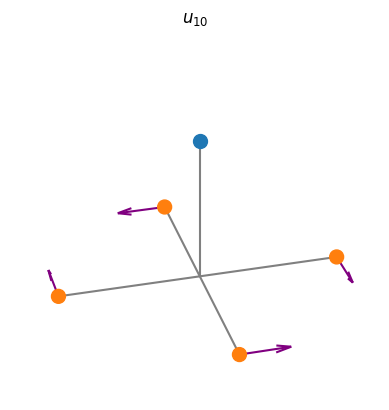

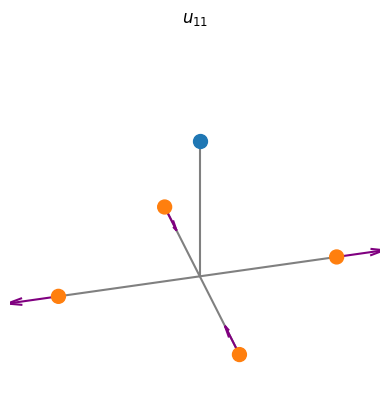

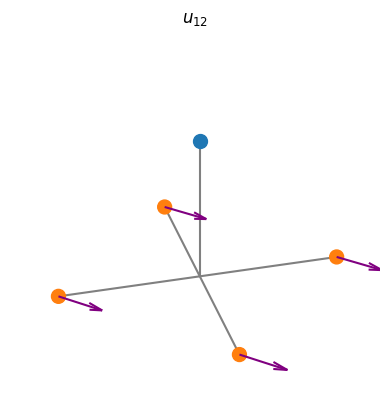

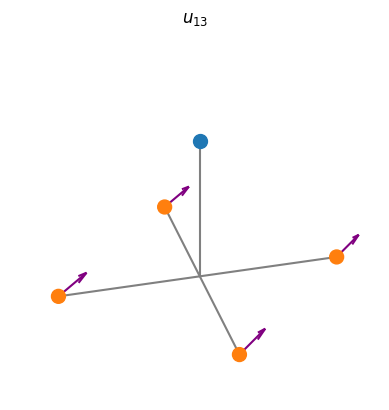

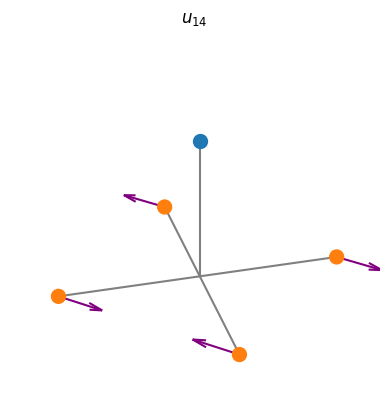

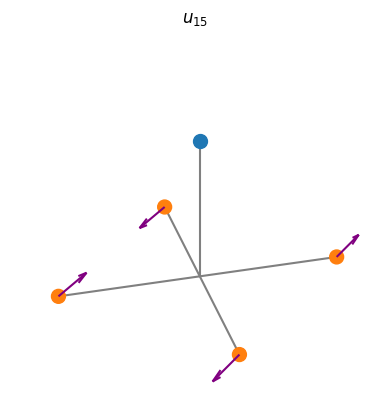

In [11]:
initial_coords_u8 = np.zeros((3,5), dtype=float)
initial_coords_u8[0,1] = 1 # init vector
sym_adap_u8 = get_symmetry_adapted_modes(initial_coords_u8, 0, mechanical_rep_C4v, character_table_C4v, elements_per_class_C4v)

initial_coords_u9 = np.zeros((3,5), dtype=float)
initial_coords_u9[0,1] = 1 # init vector
sym_adap_u9 = get_symmetry_adapted_modes(initial_coords_u9, 1, mechanical_rep_C4v, character_table_C4v, elements_per_class_C4v)

initial_coords_u10 = np.zeros((3,5), dtype=float)
initial_coords_u10[0,1] = 1 # init vector
sym_adap_u10 = get_symmetry_adapted_modes(initial_coords_u10, 2, mechanical_rep_C4v, character_table_C4v, elements_per_class_C4v)

initial_coords_u11 = np.zeros((3,5), dtype=float)
initial_coords_u11[0,1] = 1 # init vector
sym_adap_u11 = get_symmetry_adapted_modes(initial_coords_u11, 3, mechanical_rep_C4v, character_table_C4v, elements_per_class_C4v)

initial_coords_u12 = np.zeros((3,5), dtype=float)
initial_coords_u12[0,1] = 1 # init vector
initial_coords_u12[0,2] = 1 # init vector
sym_adap_u12 = get_symmetry_adapted_modes(initial_coords_u12, 4, mechanical_rep_C4v, character_table_C4v, elements_per_class_C4v)

initial_coords_u13 = np.zeros((3,5), dtype=float)
initial_coords_u13[1,1] = 1 # init vector
initial_coords_u13[1,2] = 1 # init vector
sym_adap_u13 = get_symmetry_adapted_modes(initial_coords_u13, 4, mechanical_rep_C4v, character_table_C4v, elements_per_class_C4v)

initial_coords_u14 = np.zeros((3,5), dtype=float)
initial_coords_u14[0,1] = 1 # init vector
initial_coords_u14[0,2] = -1 # init vector
sym_adap_u14 = get_symmetry_adapted_modes(initial_coords_u14, 4, mechanical_rep_C4v, character_table_C4v, elements_per_class_C4v)

initial_coords_u15 = np.zeros((3,5), dtype=float)
initial_coords_u15[1,1] = 1 # init vector
initial_coords_u15[1,2] = -1 # init vector
sym_adap_u15 = get_symmetry_adapted_modes(initial_coords_u15, 4, mechanical_rep_C4v, character_table_C4v, elements_per_class_C4v)


# plotting
plot_mode_C4v(sym_adap_u8, atom_spatial_coordinates_C4v, "$u_8$")
plot_mode_C4v(sym_adap_u9, atom_spatial_coordinates_C4v, "$u_9$")
plot_mode_C4v(sym_adap_u10, atom_spatial_coordinates_C4v, "$u_{10}$")
plot_mode_C4v(sym_adap_u11, atom_spatial_coordinates_C4v, "$u_{11}$")
plot_mode_C4v(sym_adap_u12, atom_spatial_coordinates_C4v, "$u_{12}$")
plot_mode_C4v(sym_adap_u13, atom_spatial_coordinates_C4v, "$u_{13}$")
plot_mode_C4v(sym_adap_u14, atom_spatial_coordinates_C4v, "$u_{14}$")
plot_mode_C4v(sym_adap_u15, atom_spatial_coordinates_C4v, "$u_{15}$")

plt.show()

### UF6 (Oh)

In [12]:
atom_spatial_coordinates_Oh = np.array([
    [ 0, 1, 0,-1, 0, 0, 0],
    [ 0, 0, 1, 0,-1, 0, 0],
    [ 0, 0, 0, 0, 0, 1,-1]
])

vector_rep_Oh = np.array([
    [
        [ 1, 0, 0], # 1 ##########
        [ 0, 1, 0],
        [ 0, 0, 1]
    ],
    [
        [-1, 0, 0], # 2001 ##########
        [ 0,-1, 0],
        [ 0, 0, 1]
    ],
    [
        [-1, 0, 0], # 2010 
        [ 0, 1, 0],
        [ 0, 0,-1]
    ],
    [
        [ 1, 0, 0], # 2100
        [ 0,-1, 0],
        [ 0, 0,-1]
    ],
    [
        [ 0, 1, 0], # 4001- ##########
        [-1, 0, 0],
        [ 0, 0, 1]
    ],
    [
        [ 0,-1, 0], # 4001+
        [ 1, 0, 0],
        [ 0, 0, 1]
    ],
    [
        [ 0, 0,-1], # 4010-
        [ 0, 1, 0],
        [ 1, 0, 0]
    ],
    [
        [ 0, 0, 1], # 4010+
        [ 0, 1, 0],
        [-1, 0, 0]
    ],
    [
        [ 1, 0, 0], # 4100-
        [ 0, 0, 1],
        [ 0,-1, 0]
    ],
    [
        [ 1, 0, 0], # 4100+
        [ 0, 0,-1],
        [ 0, 1, 0]
    ],
    [
        [ 0, 1, 0], # 2_110 ##########
        [ 1, 0, 0],
        [ 0, 0,-1]
    ],
    [
        [ 0,-1, 0], # 2_1-10
        [-1, 0, 0],
        [ 0, 0,-1]
    ],
    [
        [-1, 0, 0], # 2_011
        [ 0, 0, 1],
        [ 0, 1, 0]
    ],
    [
        [-1, 0, 0], # 2_01-1
        [ 0, 0,-1],
        [ 0,-1, 0]
    ],
    [
        [ 0, 0, 1], # 2_101
        [ 0,-1, 0],
        [ 1, 0, 0]
    ],
    [
        [ 0, 0,-1], # 2_-101
        [ 0,-1, 0],
        [-1, 0, 0]
    ],
    [
        [ 0, 0, 1], # 3_111+ ##########
        [ 1, 0, 0],
        [ 0, 1, 0]
    ],
    [
        [ 0, 0, 1], # 3_-11-1+
        [-1, 0, 0],
        [ 0,-1, 0]
    ],
    [
        [ 0, 0,-1], # 3_1-1-1+
        [-1, 0, 0],
        [ 0, 1, 0]
    ],
    [
        [ 0, 0,-1], # 3_-1-11+
        [ 1, 0, 0],
        [ 0,-1, 0]
    ],
    [
        [ 0, 1, 0], # 3_111-
        [ 0, 0, 1],
        [ 1, 0, 0]
    ],
    [
        [ 0,-1, 0], # 3_1-1-1-
        [ 0, 0, 1],
        [-1, 0, 0]
    ],
    [
        [ 0, 1, 0], # 3_1-1-1-
        [ 0, 0,-1],
        [-1, 0, 0]
    ],
    [
        [ 0,-1, 0], # 3_-11-1-
        [ 0, 0,-1],
        [ 1, 0, 0]
    ],
    [
        [-1, 0, 0], # i ##########
        [ 0,-1, 0],
        [ 0, 0,-1]
    ],
    [
        [ 1, 0, 0], # m001 ##########
        [ 0, 1, 0],
        [ 0, 0,-1]
    ],
    [
        [ 1, 0, 0], # m010 
        [ 0,-1, 0],
        [ 0, 0, 1]
    ],
    [
        [-1, 0, 0], # m100 
        [ 0, 1, 0],
        [ 0, 0, 1]
    ],
    [
        [ 0,-1, 0], # -4001- ##########
        [ 1, 0, 0],
        [ 0, 0,-1]
    ],
    [
        [ 0, 1, 0], # -4001+ 
        [-1, 0, 0],
        [ 0, 0,-1]
    ],
    [
        [ 0, 0, 1], # -4010- 
        [ 0,-1, 0],
        [-1, 0, 0]
    ],
    [
        [ 0, 0,-1], # -4010+ 
        [ 0,-1, 0],
        [ 1, 0, 0]
    ],
    [
        [-1, 0, 0], # -4100- 
        [ 0, 0,-1],
        [ 0, 1, 0]
    ],
    [
        [-1, 0, 0], # -4100+ 
        [ 0, 0, 1],
        [ 0,-1, 0]
    ],
    [
        [ 0,-1, 0], # m110 ##########
        [-1, 0, 0],
        [ 0, 0, 1]
    ],
    [
        [ 0, 1, 0], # m1-10 
        [ 1, 0, 0],
        [ 0, 0, 1]
    ],
    [
        [ 1, 0, 0], # m011 
        [ 0, 0,-1],
        [ 0,-1, 0]
    ],
    [
        [ 1, 0, 0], # m01-1 
        [ 0, 0, 1],
        [ 0, 1, 0]
    ],
    [
        [ 0, 0,-1], # m101 
        [ 0, 1, 0],
        [-1, 0, 0]
    ],
    [
        [ 0, 0, 1], # m-101 
        [ 0, 1, 0],
        [ 1, 0, 0]
    ],
    [
        [ 0, 0,-1], # -3111+ 
        [-1, 0, 0],
        [ 0,-1, 0]
    ],
    [
        [ 0, 0,-1], # -3-11-1+ 
        [ 1, 0, 0],
        [ 0, 1, 0]
    ],
    [
        [ 0, 0, 1], # -31-1-1+ 
        [ 1, 0, 0],
        [ 0,-1, 0]
    ],
    [
        [ 0, 0, 1], # -3-1-11+ 
        [-1, 0, 0],
        [ 0, 1, 0]
    ],
    [
        [ 0,-1, 0], # -3111- 
        [ 0, 0,-1],
        [-1, 0, 0]
    ],
    [
        [ 0, 1, 0], # -31-1-1- 
        [ 0, 0,-1],
        [ 1, 0, 0]
    ],
    [
        [ 0,-1, 0], # -3-1-1-1
        [ 0, 0, 1],
        [ 1, 0, 0]
    ],
    [
        [ 0, 1, 0], # -3-11-1
        [ 0, 0, 1],
        [-1, 0, 0]
    ],
])

# generate the mechanical rep
mechanical_rep_Oh = get_mechanical_representation(atom_spatial_coordinates_Oh, vector_rep_Oh)

In [17]:
def plot_mode_Oh(sym_adap, atom_spatial_coordinates, title):
    # Initialize axis object
    ax = plt.figure().add_subplot(projection='3d')

    # plotting vectors
    ax.quiver(
        atom_spatial_coordinates[0,:],
        atom_spatial_coordinates[1,:],
        atom_spatial_coordinates[2,:],
        sym_adap[0,:],
        sym_adap[1,:],
        sym_adap[2,:],
        length=0.5,
        normalize=True,
        color="purple"
        )

    x = np.linspace(-1,1,100)
    y = np.linspace(-1,1,100)
    z = np.linspace(-1,1,100)
    zeros = np.zeros(100)

    ax.plot3D(x, zeros, zeros, color="grey")
    ax.plot3D(zeros, y, zeros, color="grey")
    ax.plot3D(zeros, zeros, z, color="grey")

    # plotting the atoms
    ax.scatter(atom_spatial_coordinates[0,0],atom_spatial_coordinates[1,0],atom_spatial_coordinates[2,0], s=100, alpha=1) # U atom
    ax.scatter(atom_spatial_coordinates[0,1:],atom_spatial_coordinates[1,1:],atom_spatial_coordinates[2,1:], s=100, alpha=1) # F atoms

    # plotting title
    ax.set_title(title)
    ax.set_axis_off()
    
    pass

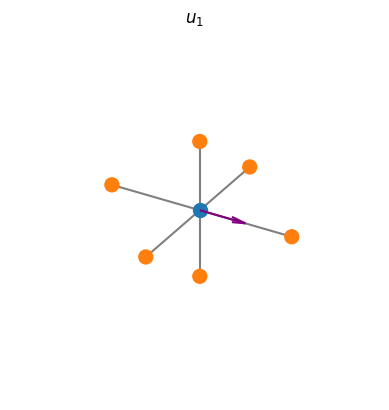

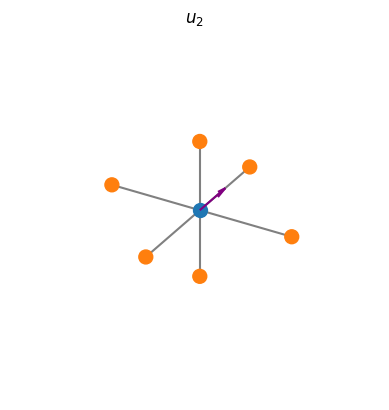

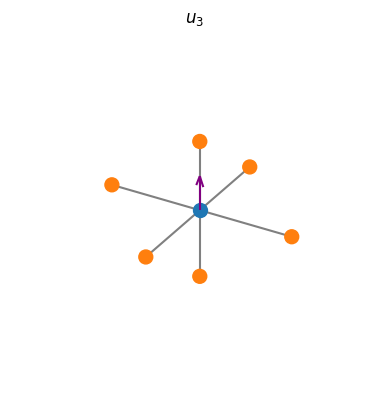

In [19]:
initial_coords_u1 = np.zeros((3,7), dtype=float)
initial_coords_u1[0,0] = 1 # init vector
sym_adap_u1 = get_symmetry_adapted_modes(initial_coords_u1, 7, mechanical_rep_Oh, character_table_Oh, elements_per_class_Oh)

initial_coords_u2 = np.zeros((3,7), dtype=float)
initial_coords_u2[1,0] = 1 # init vector
sym_adap_u2 = get_symmetry_adapted_modes(initial_coords_u2, 7, mechanical_rep_Oh, character_table_Oh, elements_per_class_Oh)

initial_coords_u3 = np.zeros((3,7), dtype=float)
initial_coords_u3[2,0] = 1 # init vector
sym_adap_u3 = get_symmetry_adapted_modes(initial_coords_u3, 7, mechanical_rep_Oh, character_table_Oh, elements_per_class_Oh)

plot_mode_Oh(sym_adap_u1, atom_spatial_coordinates_Oh, "$u_1$")
plot_mode_Oh(sym_adap_u2, atom_spatial_coordinates_Oh, "$u_2$")
plot_mode_Oh(sym_adap_u3, atom_spatial_coordinates_Oh, "$u_3$")

plt.show()

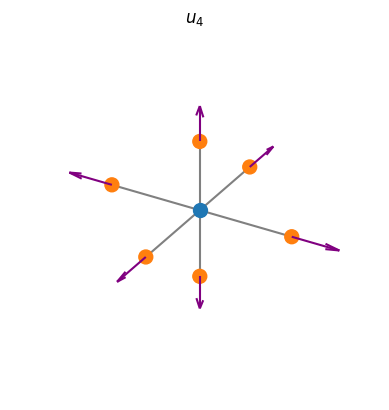

In [20]:
initial_coords_u4 = np.zeros((3,7), dtype=float)
initial_coords_u4[0,1] = 1 # init vector
sym_adap_u4 = get_symmetry_adapted_modes(initial_coords_u4, 0, mechanical_rep_Oh, character_table_Oh, elements_per_class_Oh)

plot_mode_Oh(sym_adap_u4, atom_spatial_coordinates_Oh, "$u_4$")

plt.show()

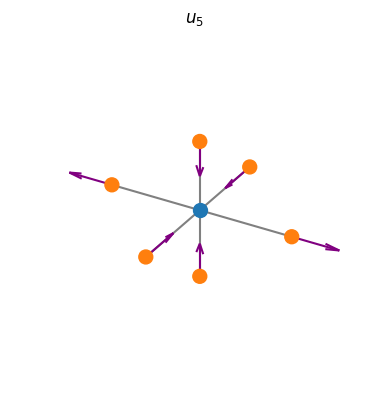

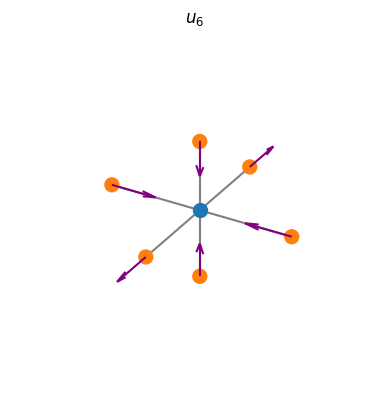

In [22]:
initial_coords_u5 = np.zeros((3,7), dtype=float)
initial_coords_u5[0,1] = 1 # init vector
sym_adap_u5 = get_symmetry_adapted_modes(initial_coords_u5, 4, mechanical_rep_Oh, character_table_Oh, elements_per_class_Oh)

initial_coords_u6 = np.zeros((3,7), dtype=float)
initial_coords_u6[1,2] = 1 # init vector
sym_adap_u6 = get_symmetry_adapted_modes(initial_coords_u6, 4, mechanical_rep_Oh, character_table_Oh, elements_per_class_Oh)

plot_mode_Oh(sym_adap_u5, atom_spatial_coordinates_Oh, "$u_5$")
plot_mode_Oh(sym_adap_u6, atom_spatial_coordinates_Oh, "$u_6$")

plt.show()

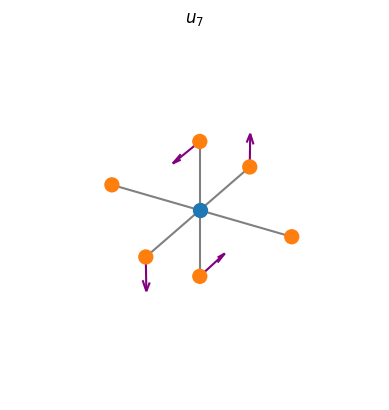

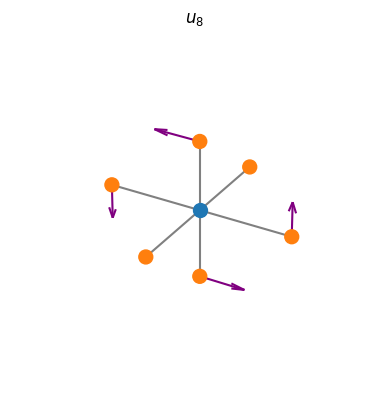

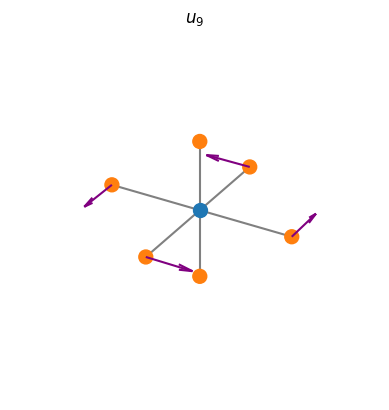

In [29]:
initial_coords_u7 = np.zeros((3,7), dtype=float)
initial_coords_u7[2,2] = 1 # init vector
sym_adap_u7 = get_symmetry_adapted_modes(initial_coords_u7, 6, mechanical_rep_Oh, character_table_Oh, elements_per_class_Oh)

initial_coords_u8 = np.zeros((3,7), dtype=float)
initial_coords_u8[2,1] = 1 # init vector
sym_adap_u8 = get_symmetry_adapted_modes(initial_coords_u8, 6, mechanical_rep_Oh, character_table_Oh, elements_per_class_Oh)

initial_coords_u9 = np.zeros((3,7), dtype=float)
initial_coords_u9[1,1] = 1 # init vector
sym_adap_u9 = get_symmetry_adapted_modes(initial_coords_u9, 6, mechanical_rep_Oh, character_table_Oh, elements_per_class_Oh)

plot_mode_Oh(sym_adap_u7, atom_spatial_coordinates_Oh, "$u_7$")
plot_mode_Oh(sym_adap_u8, atom_spatial_coordinates_Oh, "$u_8$")
plot_mode_Oh(sym_adap_u9, atom_spatial_coordinates_Oh, "$u_9$")

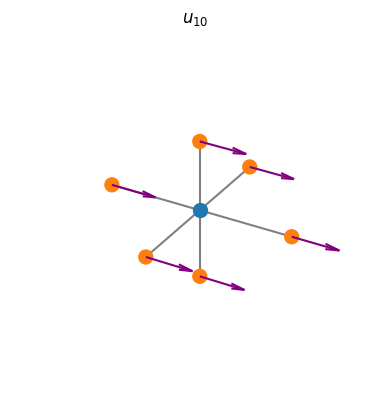

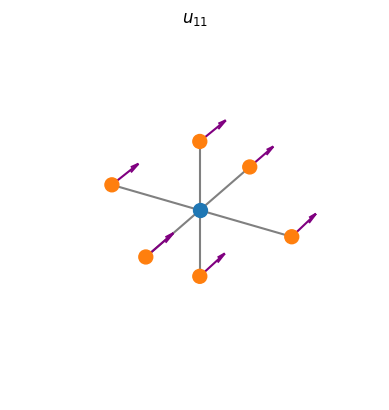

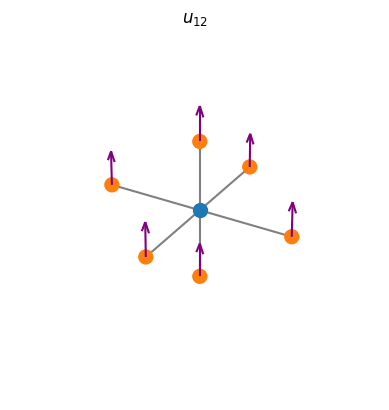

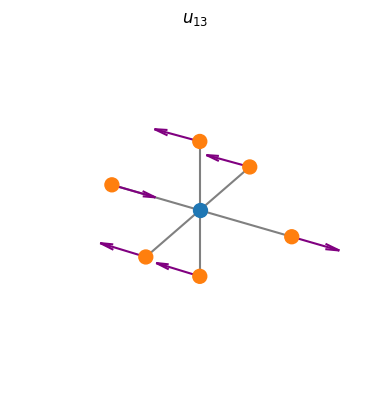

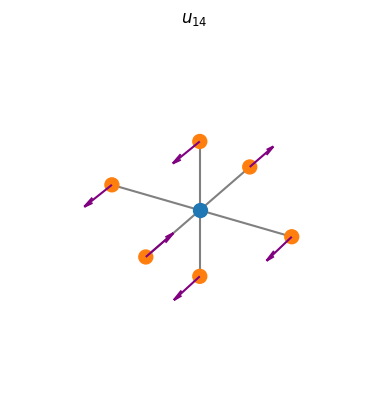

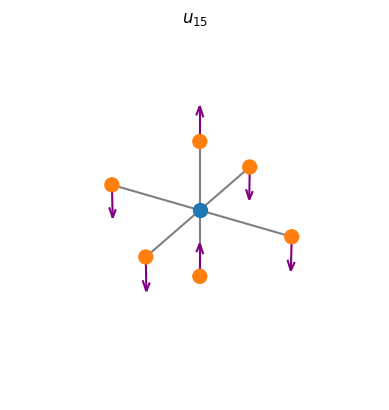

In [ ]:
initial_coords_u10 = np.zeros((3,7), dtype=float)
initial_coords_u10[0,1] = 1 # init vector
initial_coords_u10[0,2] = 1 # init vector
initial_coords_u10[0,5] = 1 # init vector
sym_adap_u10 = get_symmetry_adapted_modes(initial_coords_u10, 7, mechanical_rep_Oh, character_table_Oh, elements_per_class_Oh)

initial_coords_u11 = np.zeros((3,7), dtype=float)
initial_coords_u11[1,1] = 1 # init vector
initial_coords_u11[1,2] = 1 # init vector
initial_coords_u11[1,5] = 1 # init vector
sym_adap_u11 = get_symmetry_adapted_modes(initial_coords_u11, 7, mechanical_rep_Oh, character_table_Oh, elements_per_class_Oh)

initial_coords_u12 = np.zeros((3,7), dtype=float)
initial_coords_u12[2,1] = 1 # init vector
initial_coords_u12[2,2] = 1 # init vector
initial_coords_u12[2,5] = 1 # init vector
sym_adap_u12 = get_symmetry_adapted_modes(initial_coords_u12, 7, mechanical_rep_Oh, character_table_Oh, elements_per_class_Oh)

initial_coords_u13 = np.zeros((3,7), dtype=float)
initial_coords_u13[0,1] = 1 # init vector
initial_coords_u13[0,2] = -1 # init vector
initial_coords_u13[0,5] = -1 # init vector
sym_adap_u13 = get_symmetry_adapted_modes(initial_coords_u13, 7, mechanical_rep_Oh, character_table_Oh, elements_per_class_Oh)

initial_coords_u14 = np.zeros((3,7), dtype=float)
initial_coords_u14[1,1] = -1 # init vector
initial_coords_u14[1,2] = 1 # init vector
initial_coords_u14[1,5] = -1 # init vector
sym_adap_u14 = get_symmetry_adapted_modes(initial_coords_u14, 7, mechanical_rep_Oh, character_table_Oh, elements_per_class_Oh)

initial_coords_u15 = np.zeros((3,7), dtype=float)
initial_coords_u15[2,1] = -1 # init vector
initial_coords_u15[2,2] = -1 # init vector
initial_coords_u15[2,5] = 1 # init vector
sym_adap_u15 = get_symmetry_adapted_modes(initial_coords_u15, 7, mechanical_rep_Oh, character_table_Oh, elements_per_class_Oh)

plot_mode_Oh(sym_adap_u10, atom_spatial_coordinates_Oh, "$u_{10}$")
plot_mode_Oh(sym_adap_u11, atom_spatial_coordinates_Oh, "$u_{11}$")
plot_mode_Oh(sym_adap_u12, atom_spatial_coordinates_Oh, "$u_{12}$")
plot_mode_Oh(sym_adap_u13, atom_spatial_coordinates_Oh, "$u_{13}$")
plot_mode_Oh(sym_adap_u14, atom_spatial_coordinates_Oh, "$u_{14}$")
plot_mode_Oh(sym_adap_u15, atom_spatial_coordinates_Oh, "$u_{15}$")

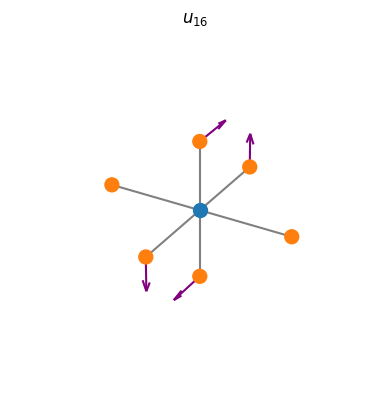

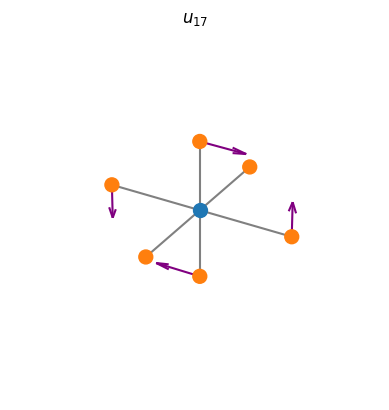

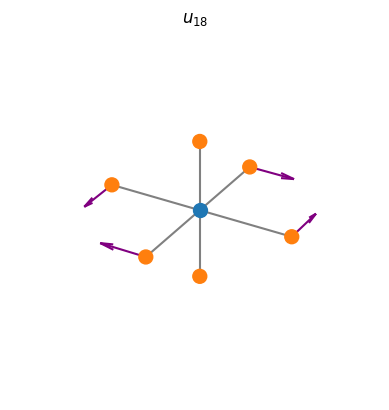

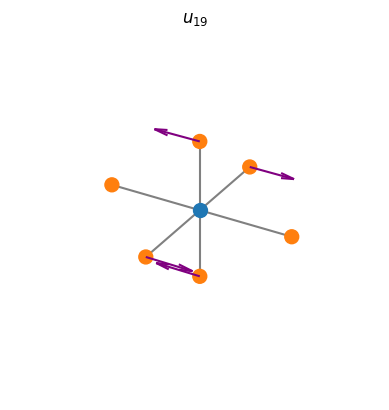

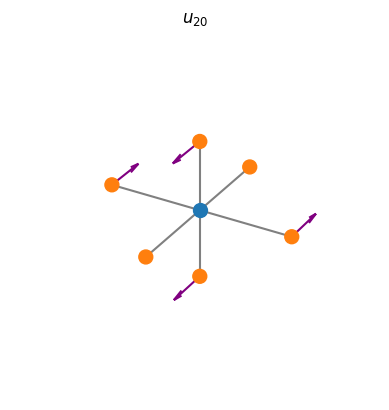

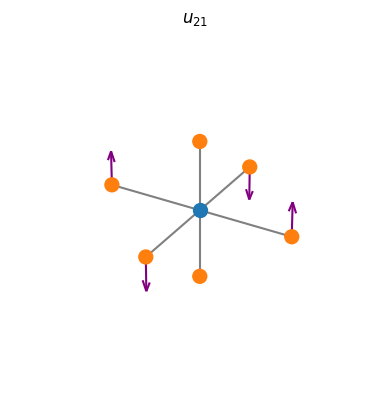

In [ ]:
initial_coords_u16 = np.zeros((3,7), dtype=float)
initial_coords_u16[2,2] = 1 # init vector
sym_adap_u16 = get_symmetry_adapted_modes(initial_coords_u16, 8, mechanical_rep_Oh, character_table_Oh, elements_per_class_Oh)

initial_coords_u17 = np.zeros((3,7), dtype=float)
initial_coords_u17[2,1] = 1 # init vector
sym_adap_u17 = get_symmetry_adapted_modes(initial_coords_u17, 8, mechanical_rep_Oh, character_table_Oh, elements_per_class_Oh)

initial_coords_u18 = np.zeros((3,7), dtype=float)
initial_coords_u18[1,1] = 1 # init vector
sym_adap_u18 = get_symmetry_adapted_modes(initial_coords_u18, 8, mechanical_rep_Oh, character_table_Oh, elements_per_class_Oh)

plot_mode_Oh(sym_adap_u16, atom_spatial_coordinates_Oh, "$u_{16}$")
plot_mode_Oh(sym_adap_u17, atom_spatial_coordinates_Oh, "$u_{17}$")
plot_mode_Oh(sym_adap_u18, atom_spatial_coordinates_Oh, "$u_{18}$")


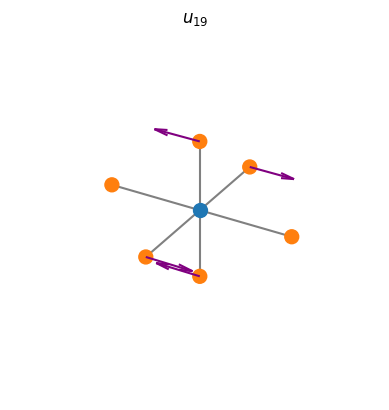

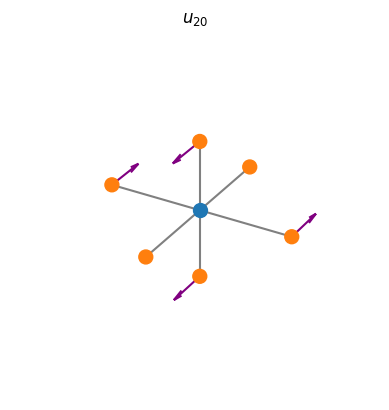

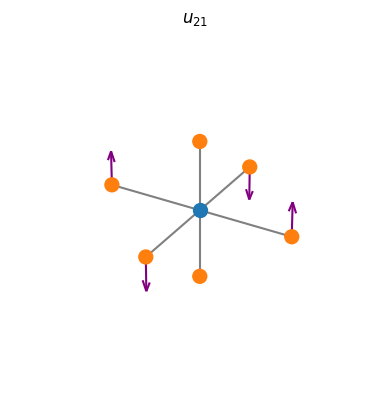

In [53]:
initial_coords_u19 = np.zeros((3,7), dtype=float)
initial_coords_u19[0,2] = 1 # init vector
sym_adap_u19 = get_symmetry_adapted_modes(initial_coords_u19, 9, mechanical_rep_Oh, character_table_Oh, elements_per_class_Oh)

initial_coords_u20 = np.zeros((3,7), dtype=float)
initial_coords_u20[1,1] = 1 # init vector
sym_adap_u20 = get_symmetry_adapted_modes(initial_coords_u20, 9, mechanical_rep_Oh, character_table_Oh, elements_per_class_Oh)

initial_coords_u21 = np.zeros((3,7), dtype=float)
initial_coords_u21[2,1] = 1 # init vector
sym_adap_u21 = get_symmetry_adapted_modes(initial_coords_u21, 9, mechanical_rep_Oh, character_table_Oh, elements_per_class_Oh)

plot_mode_Oh(sym_adap_u19, atom_spatial_coordinates_Oh, "$u_{19}$")
plot_mode_Oh(sym_adap_u20, atom_spatial_coordinates_Oh, "$u_{20}$")
plot_mode_Oh(sym_adap_u21, atom_spatial_coordinates_Oh, "$u_{21}$")